# Libraries

In [1]:
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# KNN
from sklearn import neighbors


# openml.org is a public repository for machine learning data and experiments, that allows everybody to upload open datasets.
from sklearn.datasets import fetch_openml


# Import Data

In [2]:
# Load data from https://www.openml.org/d/554
# return_X_y returns (data, target) instead of a Bunch object.
# as_frame is False since we want numpy arrays instead of datasets for modelling

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Data Preprocessing

In [3]:
# The import returns an array with 70k image arrays (pixels)
X.shape

(70000, 784)

In [4]:
# and corresponding labels
y.shape

(70000,)

In [5]:
# Standardizing the pixels array
X = preprocessing.normalize(X, norm='max')

In [6]:
# As a first preprocessing step, we should split the dataset into training and test datasets
trainSize = 60000
testSize = 10000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=trainSize, test_size=testSize)

## Visualizing the dataset

Each data point is stored as 784-dimensional vector. To visualize a data point, we first need to reshape it to a 28 x 28 image.

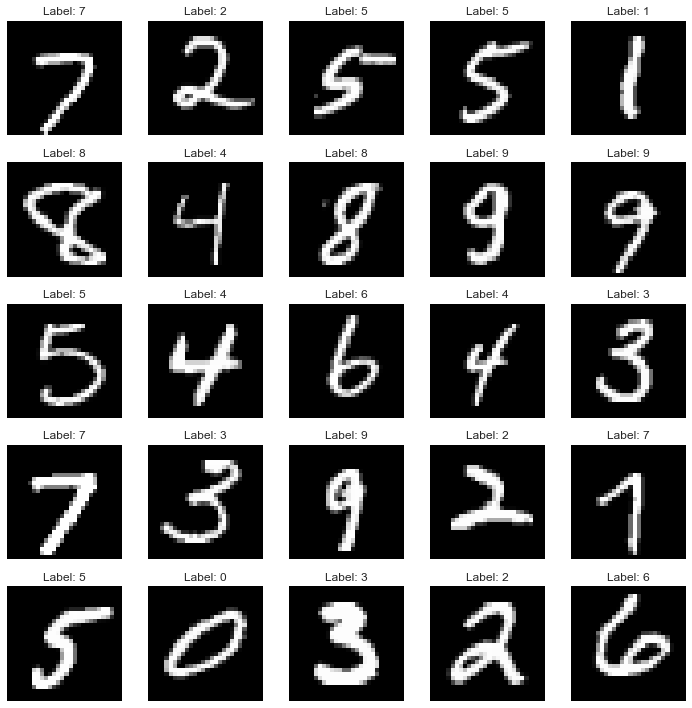

In [7]:
## function that displays a digit given its vector representation
def get_number(x, label):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.title('Label: ' + str(label))
    
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    get_number(X_test[i,], y_test[i])
    
plt.tight_layout()
plt.show()

# k-nearest neighbors (KNN) classifier

In [98]:
# Build nearest neighbor structure on training data
t_before = time.time()
model_KNN = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
t_after = time.time()
## Compute training time
t_training_KNN = t_after - t_before
print("Time to build KNN neighbor classfier on training data (seconds): ", t_training)

Time to build KNN neighbor classfier on training data (seconds):  17.144163846969604


In [101]:
## Get nearest neighbor predictions on testing data
t_before = time.time()
test_pred_KNN = model_KNN.predict(X_test)
t_after = time.time()
## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

Time to classify test set (seconds):  694.3690509796143


In [102]:
# evaluate the classifier
t_accuracy = sum(test_pred_KNN == y_test) / float(len(y_test))
t_accuracy

0.9723

<AxesSubplot:>

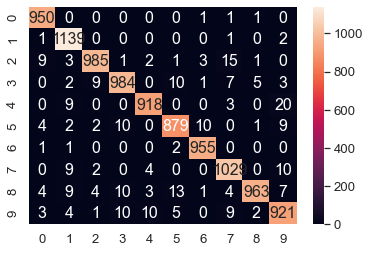

In [103]:
cm = metrics.confusion_matrix(y_test,test_pred_KNN)
df_cm = pd.DataFrame(cm, range(10), range(10))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g") 